Brief description: This project is about predicting wine quality, basically a classification problem. The data contains 11 features and 1599 observations.

Performed:
>>Adjust Target variable to be discrete

>>Feature Selection- Pearson Correlation Matrix
                    - PCA (Not performed) - used when there are huge number of features/dimentions
                    We maximize variance by drwaing a line (like linear regression) called eigen vector or principle component and we squeeze it towards the line called Decomposition. New variable position is called eigen value

>>Preprocessing - Feature scaling - if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

>> Model selection - Random Forest
                   - SVM
>> Cross Validation on Random Forest and SVM
CV is a resampling technique which allows us to compare different ML model performance.
                   

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
#Multi Layer Perceptron Classifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns

In [29]:
wine = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/DatasetR/winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine.shape

(1599, 12)

In [7]:
#Creating a discrete target variable

bins = (2, 6.5, 8) #2 bins -> good, bad ;; min val, max val
group_name = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_name)#panda cutting quality column and replacing with 

In [8]:
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_quality = LabelEncoder() #Label Encoder function will encode bad to 0 and good to 1, acts as step function

wine['quality'] = label_quality.fit_transform(wine['quality']) #Applying encoder to the data

In [10]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,0


In [11]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [12]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [13]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\My Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

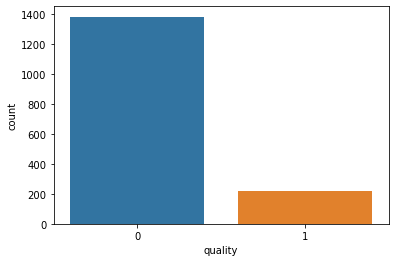

In [14]:
import seaborn as sns
sns.countplot(wine['quality'])

In [15]:
# Reformatting dataset
# Separate the dataset as response variable and feature variable
#quality will be dependent variable, rest all are independent variable

X = wine.drop('quality', axis = 1)# X variable denotes features we are working with

y = wine['quality']# y denotes quality we are looking for or target variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) #42 is just random seed number

total sulphur dioxide attribute greatly differ in ranges. StandardScaler removes the mean and scales the data to the unit variance. However, outliers have an influence when calculating the empirical mean and standard deviation, which narrows the range of characteristic values. These differences in the initial features can cause problems for many machine learning models.
he idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 

So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

Ref: https://thecleverprogrammer.com/2020/09/22/standardscaler-in-machine-learning/#:~:text=In%20Machine%20Learning%2C%20StandardScaler%20is,the%20standard%20deviation%20is%201.

Exploratory Data Analysis:
Correlation Matrix for Feature selection
NOTE: A correlation of -0.80 is just as strong as a correlation of +0.80. And a correlation of -0.75 is stronger than a +0.56.

In [17]:
X_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.242533,0.669197,0.116167,0.088058,-0.155080,-0.111576,0.660577,-0.676197,0.173066,-0.058827
volatile acidity,-0.242533,1.000000,-0.545491,0.007461,0.065063,-0.002211,0.083318,0.032228,0.217903,-0.266083,-0.210254
citric acid,0.669197,-0.545491,1.000000,0.152596,0.221817,-0.067874,0.034224,0.367675,-0.540161,0.315754,0.106708
residual sugar,0.116167,0.007461,0.152596,1.000000,0.063500,0.167828,0.162079,0.377377,-0.076215,0.009121,0.042239
chlorides,0.088058,0.065063,0.221817,0.063500,1.000000,0.012782,0.046437,0.185999,-0.268871,0.381678,-0.213184
free sulfur dioxide,-0.155080,-0.002211,-0.067874,0.167828,0.012782,1.000000,0.668166,-0.021194,0.066672,0.061942,-0.083883
total sulfur dioxide,-0.111576,0.083318,0.034224,0.162079,0.046437,0.668166,1.000000,0.075224,-0.070382,0.050056,-0.227074
density,0.660577,0.032228,0.367675,0.377377,0.185999,-0.021194,0.075224,1.000000,-0.332869,0.133472,-0.480249
pH,-0.676197,0.217903,-0.540161,-0.076215,-0.268871,0.066672,-0.070382,-0.332869,1.000000,-0.211560,0.217202
sulphates,0.173066,-0.266083,0.315754,0.009121,0.381678,0.061942,0.050056,0.133472,-0.211560,1.000000,0.097721


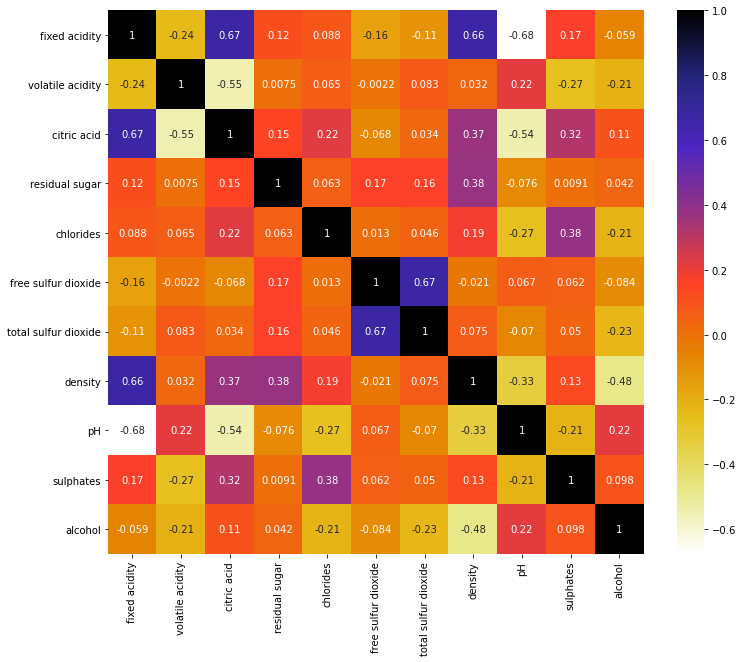

In [19]:
#Using Pearson Correlation
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

If we consider threshold at 70%, no significant correlation is found between independent variables. In case some correlation is found, columns can be dropped right away from train set.

In [23]:
#Applying standard scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

In [ ]:
#Model Selection: Comparing models

## Random Forest Classifier

In [22]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)


In [23]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [24]:
#testing model performance
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       273
           1       0.72      0.60      0.65        47

    accuracy                           0.91       320
   macro avg       0.83      0.78      0.80       320
weighted avg       0.90      0.91      0.90       320



In [50]:
cf_rf = confusion_matrix(y_test, pred_rfc)
print(cf_rf)

[[262  11]
 [ 19  28]]


<AxesSubplot:>

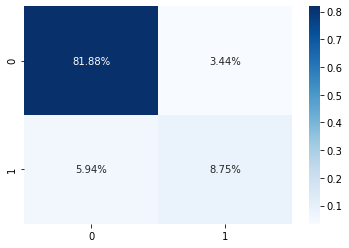

In [52]:
import numpy as np
sns.heatmap(cf_rf/np.sum(cf_rf), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
#90 % accurate model with random forest

In [ ]:
# 11 mislabelled for bad wine, 19 mislabelled for good wine

## SVM Classifier


In [37]:
from sklearn import svm

In [38]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [41]:
#testing model performance
print(classification_report(y_test, pred_clf))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



In [54]:
cf_svm = confusion_matrix(y_test, pred_clf)
print(cf_svm)

[[273   0]
 [ 46   1]]


<AxesSubplot:>

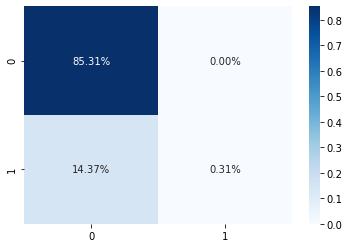

In [55]:
## Confusion matrix visualization

import numpy as np
sns.heatmap(cf_svm/np.sum(cf_svm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
# 85 % accurate model with SVM

In [ ]:
## Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold

In [61]:
#creating list for the different models
models = []
models.append(('RFC', rfc))
models.append(('SVM', clf))
print(models)

[('RFC', RandomForestClassifier(n_estimators=50)), ('SVM', SVC())]


In [66]:
results = dict()

for name, mod in models:
    kfold = KFold(n_splits=10,random_state=7,shuffle=True)
    cv_results = cross_val_score(mod, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name]= (cv_results.mean(), cv_results.std())
    
print()
print("name     results.mean     results.std")
for key, value in results.items():
    print(key,value)


name     results.mean     results.std
RFC (0.9155450295275591, 0.025442833813832916)
SVM (0.8670583169291339, 0.021158385130281558)


In [ ]:
#RFC is having .91 accuracy with std .02
#SVM is having .86 accuracy with std .02